In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import FileLink


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [71]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [72]:
data = pd.read_csv('C:\\Users\\user\\Desktop\\zz\\heart.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,normalized_age,normalized_chol,normalized_trestbps,normalized_thalach,normalized_oldpeak
0,52,1,0,125,212,0,1,168,0,1.00,2,1,3,0,0.33,1,4,0.81,-0.05
1,53,1,0,140,203,1,0,155,1,3.10,0,3,3,0,1.00,1,3,0.24,1.76
2,70,1,0,145,174,0,1,125,1,2.60,0,3,3,0,1.00,0,3,-1.07,1.33
3,61,1,0,148,203,0,1,161,0,0.00,2,2,3,0,0.67,1,3,0.50,-0.91
4,62,0,0,138,294,1,1,106,0,1.90,1,0,2,0,0.00,2,2,-1.89,0.73


***Understanding Data***


*   age     -     Age in years

*   sex     -     Gender
        1 = Male
        0 = Female

*   cp      -     Chest Pain Types
        0 = Typical Angina
        1 = Atypical Angina
        2 = Non-anginal pain
        3 = Asymptomatic

*   trestbps - Resting blood pressure (in mm Hg)

*   chol - Serum Cholestrol (in mg/dl)

*   fbs - Fasting Blood Sugar > 120 mg/dl
        1 = true
        0 = false

*   restecg - Resting ECG results
        0 = normal
        1 = abnormality ST-T wave abnormality
        2 =  Showing probable or definite left ventricular hypertrophy by Estes' criteria

*   thalach - Maximum Heart rate achieved

*   exang - Exercise induced Angina
        1 = Yes
        0 = No

*   oldpeak - ST depression induced by exercise

*   slope - Slope of Peak exercise ST
        0 = Unsloping
        1 = flat
        2 = Downslopping

*   ca - No. of Major Vessels (0-3) (Flouroscopy)

*   thal - Thalassemia
        1 = normal
        2 = fixed defect
        3 = reversable defect

*   target - Presence or absence of disease
        1 = Yes
        0 = No









***Describing Data***

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  298 non-null    int64  
 1   sex                  298 non-null    int64  
 2   cp                   298 non-null    int64  
 3   trestbps             298 non-null    int64  
 4   chol                 298 non-null    int64  
 5   fbs                  298 non-null    int64  
 6   restecg              298 non-null    int64  
 7   thalach              298 non-null    int64  
 8   exang                298 non-null    int64  
 9   oldpeak              298 non-null    float64
 10  slope                298 non-null    int64  
 11  ca                   298 non-null    int64  
 12  thal                 298 non-null    int64  
 13  target               298 non-null    int64  
 14  normalized_age       298 non-null    float64
 15  normalized_chol      298 non-null    int

In [74]:
data.shape

(298, 19)

In [75]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,normalized_age,normalized_chol,normalized_trestbps,normalized_thalach,normalized_oldpeak
count,298.00,298.00,298.00,298.00,298.00,298.00,298.00,298.00,298.00,298.00,298.00,298.00,298.00,298.00,298.00,298.00,298.00,298.00,298.00
mean,54.51,0.68,0.96,131.58,246.91,0.15,0.52,149.47,0.33,1.06,1.40,2.33,2.31,0.54,0.78,1.36,2.43,-0.00,0.00
std,9.03,0.47,1.03,17.67,51.89,0.36,0.53,22.98,0.47,1.16,0.62,0.94,0.61,0.50,0.31,0.74,1.41,1.00,1.00
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-3.42,-0.91
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,133.00,0.00,0.00,1.00,2.00,2.00,0.00,0.67,1.00,2.00,-0.72,-0.91
50%,56.00,1.00,1.00,130.00,241.50,0.00,1.00,152.50,0.00,0.80,1.00,3.00,2.00,1.00,1.00,2.00,3.00,0.13,-0.22
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,165.75,1.00,1.60,2.00,3.00,3.00,1.00,1.00,2.00,4.00,0.71,0.47
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,3.00,3.00,1.00,1.00,2.00,4.00,2.29,4.43


### **Data Cleaning**

***Check for null/missing/invalid/duplicated data***

In [76]:
data.isnull().sum()

age                    0
sex                    0
cp                     0
trestbps               0
chol                   0
fbs                    0
restecg                0
thalach                0
exang                  0
oldpeak                0
slope                  0
ca                     0
thal                   0
target                 0
normalized_age         0
normalized_chol        0
normalized_trestbps    0
normalized_thalach     0
normalized_oldpeak     0
dtype: int64

In [77]:
data.nunique()

age                     41
sex                      2
cp                       4
trestbps                49
chol                   152
fbs                      2
restecg                  3
thalach                 91
exang                    2
oldpeak                 40
slope                    3
ca                       4
thal                     4
target                   2
normalized_age           4
normalized_chol          3
normalized_trestbps      5
normalized_thalach      91
normalized_oldpeak      40
dtype: int64

***Check null/missing/invalid data [Columnwise]***

In [78]:
data['sex'].nunique()

2

In [79]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [80]:
data['fbs'].unique()

array([0, 1], dtype=int64)

In [81]:
data['restecg'].unique()

array([1, 0, 2], dtype=int64)

In [82]:
data['thalach'].unique()

array([168, 155, 125, 161, 106, 122, 140, 145, 144, 116, 136, 192, 156,
       142, 109, 162, 165, 148, 172, 173, 146, 179, 152, 117, 115, 112,
       163, 147, 182, 105, 150, 151, 169, 166, 178, 132, 160, 123, 139,
       111, 180, 164, 202, 157, 159, 170, 138, 175, 158, 126, 143, 141,
       167,  95, 190, 118, 103, 181, 108, 177, 134, 120, 171, 149, 154,
       153,  88, 174, 114, 195, 133,  96, 124, 131, 185, 194, 128, 127,
       186, 184, 188, 130,  71, 137,  99, 121, 187,  97,  90, 129, 113],
      dtype=int64)

In [83]:
data['exang'].unique()

array([0, 1], dtype=int64)

In [84]:
data['slope'].unique()

array([2, 0, 1], dtype=int64)

In [85]:
data['ca'].unique()

array([1, 3, 2, 0], dtype=int64)

*Check and remove the duplicates*

In [86]:
data.duplicated().sum()

0

In [87]:
data.drop_duplicates(inplace = True)

*ca column refers to the number of major vessels defined by integer 0 - 3. 4 is an invalid value*

In [88]:
data.drop(data[data['ca'] == 4].index, inplace=True)

In [89]:
data['ca'].value_counts()

ca
3    175
2     65
1     38
0     20
Name: count, dtype: int64

In [90]:
data['ca'] = data['ca'].replace({0:3, 1:2, 2:1, 3:0})

In [91]:
data['ca'].value_counts()

ca
0    175
1     65
2     38
3     20
Name: count, dtype: int64

In [92]:
data['thal'].unique()

array([3, 2, 1, 0], dtype=int64)

In [93]:
data['target'].unique()

array([0, 1], dtype=int64)

### **Data Processing**

Normalize the numerical features.

Age, Blood Pressure, Cholesterol, Max Heart Rate, and Old Peak

In [94]:
#Normalize age using Scaling to Range Technique

min_max_scaler = MinMaxScaler()
data['normalized_age'] = min_max_scaler.fit_transform(data[['ca']])
data['normalized_age']


0     0.67
1     0.00
2     0.00
3     0.33
4     1.00
      ... 
293   0.00
294   0.00
295   0.33
296   0.00
297   0.33
Name: normalized_age, Length: 298, dtype: float64

In [95]:
#Normalize Cholesterol as

'''
  chol < 200 - 0     (Normal)
  200 <= chol <= 239 - 1 (Moderate)
  chol >= 240 - 2    (High)
'''

def normalize_chol(c):
  if c < 200:
    return 0
  elif c >= 200 and c <= 239:
    return 1
  else:
    return 2

data['normalized_chol'] = data['chol'].apply(normalize_chol)
data['normalized_chol']

0      1
1      1
2      0
3      1
4      2
      ..
293    1
294    0
295    2
296    2
297    0
Name: normalized_chol, Length: 298, dtype: int64

In [96]:
#Normalize blood pressure as

'''
  trestbps < 120 - 0 (Normal)
  129 <= trestbps <= 129 - 1 (Elevated)
  130 <= trestbps <= 139 - 2 (Hypertension - Stage 1)
  140 <= trestbps <= 179 - 3 (Hypertension - Stage 2)
  trestbps >= 180 - 4 (Hypertensive Crisis)
'''

def normalize_bps(b):
  if b < 120:
    return 0
  elif b >= 129 and b <= 129:
    return 1
  elif b >= 130 and b <= 139:
    return 2
  elif b >= 140 and b <= 179:
    return 3
  else:
    return 4

data['normalized_trestbps'] = data['trestbps'].apply(normalize_bps)
data['normalized_trestbps']

0      4
1      3
2      3
3      3
4      2
      ..
293    4
294    0
295    4
296    3
297    4
Name: normalized_trestbps, Length: 298, dtype: int64

In [97]:
#Normalize Heart Rate Using Z-Score as it does not contain extreme outliers and does not need clipping

scaler = StandardScaler()
data['normalized_thalach'] = scaler.fit_transform(data[['thalach']])

data['normalized_age']

0     0.67
1     0.00
2     0.00
3     0.33
4     1.00
      ... 
293   0.00
294   0.00
295   0.33
296   0.00
297   0.33
Name: normalized_age, Length: 298, dtype: float64

In [98]:

#Normalize old peak using Z-score

data['normalized_oldpeak'] = scaler.fit_transform(data[['oldpeak']])
data['normalized_oldpeak']

0     -0.05
1      1.76
2      1.33
3     -0.91
4      0.73
       ... 
293    0.38
294   -0.39
295   -0.91
296   -0.91
297    0.30
Name: normalized_oldpeak, Length: 298, dtype: float64

### **Data Analysis**

Performed----

In [99]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,normalized_age,normalized_chol,normalized_trestbps,normalized_thalach,normalized_oldpeak
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0,0.67,1,4,0.81,-0.05
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0,0.00,1,3,0.24,1.76
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0,0.00,0,3,-1.07,1.33
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0,0.33,1,3,0.50,-0.91
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0,1.00,2,2,-1.89,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,68,0,2,120,211,0,0,115,0,1.50,1,0,2,1,0.00,1,4,-1.50,0.38
294,44,0,2,108,141,0,1,175,0,0.60,1,0,2,1,0.00,0,0,1.11,-0.39
295,52,1,0,128,255,0,1,161,1,0.00,2,1,3,0,0.33,2,4,0.50,-0.91
296,59,1,3,160,273,0,0,125,0,0.00,2,0,2,0,0.00,2,3,-1.07,-0.91


In [100]:
data.to_csv('heart.csv', index=False)
FileLink('heart.csv')

c:\Users\user\Desktop\zz\heart.csv

### ***Logistic Regression from Scratch using Pandas and Numpy***

***Separate the features and label (target variable)***

In [101]:
X = data.drop(labels = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak', 'target'], axis = 1)
X

,sex,cp,fbs,restecg,exang,slope,ca,thal,normalized_age,normalized_chol,normalized_trestbps,normalized_thalach,normalized_oldpeak
0,1,0,0,1,0,2,2,3,0.67,1,4,0.81,-0.05
1,1,0,1,0,1,0,0,3,0.00,1,3,0.24,1.76
2,1,0,0,1,1,0,0,3,0.00,0,3,-1.07,1.33
3,1,0,0,1,0,2,1,3,0.33,1,3,0.50,-0.91
4,0,0,1,1,0,1,3,2,1.00,2,2,-1.89,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0,2,0,0,0,1,0,2,0.00,1,4,-1.50,0.38
294,0,2,0,1,0,1,0,2,0.00,0,0,1.11,-0.39
295,1,0,0,1,1,2,1,3,0.33,2,4,0.50,-0.91
296,1,3,0,0,0,2,0,2,0.00,2,3,-1.07,-0.91


In [102]:
Y = data['target']

***Split the data into training and test datasets***

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

In [104]:
X_train

,sex,cp,fbs,restecg,exang,slope,ca,thal,normalized_age,normalized_chol,normalized_trestbps,normalized_thalach,normalized_oldpeak
283,0,3,0,1,0,2,2,2,0.67,1,3,0.07,0.64
81,0,0,0,0,1,1,0,2,0.00,1,2,0.11,-0.74
108,0,2,0,0,0,2,0,2,0.00,2,2,-0.02,-0.48
168,1,1,1,1,0,2,0,2,0.00,1,4,1.51,-0.91
219,0,2,0,1,0,1,0,2,0.00,1,0,0.37,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,1,2,0,1,0,2,0,2,0.00,2,0,0.11,-0.91
192,1,0,0,1,1,2,0,3,0.00,1,2,0.81,-0.91
117,1,0,0,0,1,1,0,3,0.00,0,0,-1.55,0.81
47,0,3,1,0,0,2,0,2,0.00,2,3,0.55,-0.05


In [105]:
Y_train

283    1
81     1
108    1
168    1
219    1
      ..
251    0
192    1
117    0
47     1
172    1
Name: target, Length: 238, dtype: int64

In [106]:
X_train = X_train.values
X_test = X_test.values

Y_train = Y_train.values
Y_test = Y_test.values

In [107]:
Y_train = Y_train.reshape(X_train.shape[0], 1)
Y_test = Y_test.reshape(X_test.shape[0], 1)

In [108]:
print(X_train.shape) #m x n
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(238, 13)
(238, 1)
(60, 13)
(60, 1)


***Sigmoid Function:***

It is an activation function that takes real value as input and outputs in between 0 and 1

> S(z) = 1 / (1 + e^(-z))



In [109]:
def sigmoid_function(z):
  return 1 / (1 + np.exp(-z))

***Predict Function:***
The basic function is y = mx + c. For logistic regression:

> Y = WX + B

> Y = W0X0 + W1X1 + W2X2 + W3X3 ..... W12X12 + B

W = Weights, X = Features and B = Bias

In [110]:
def predict(x, w, b):
  z = np.dot(x, w) + b
  return sigmoid_function(z)

***Cost Function:***

As the prediction function is non-linear due to sigmoid activation function. The cost will be calculated using **Cross Entropy**



In [111]:
def cost_function(x, y, w, b):

  m = len(x)
  predictions = predict(x, w, b)

  cost = -(1/m)*np.sum(y*np.log(predictions) + (1-y)*np.log(1-predictions))

  return cost

***Gradient Descent:***

To minimize the cost, calculate the gradient descent of cost function. Updating the weights and bias.

>

In [112]:
def update_weights(x, y, w, b, lr ):

    m = len(x)
    p = predict(x, w, b)

    dW = (1/m) * np.dot((p-y).T, x).astype(np.float64)
    dB = (1/m)*np.sum(p - y).astype(np.float64)

    w = w - lr * dW
    b = b - lr * dB

    return w, b


***Train Function:***

In [113]:
def train(x, y, w, b, lr, iters):

  m = x.shape[0] #Number of features
  n = x.shape[1] #Number of Labels
  cost_list = []

  for i in range(iters):
    w, b = update_weights(x, y, w, b, lr)
    cost = cost_function(x, y, w, b)

    cost_list.append(cost)

    if (i % 1000 == 0):
      print(f"Iteration:{i}, Cost:{cost}")

  return w, b, cost_list

***Using Xavier Weight Initialization***

In [114]:

def xavier_init(size):
    xavier_variance = 1.0 / size[0]
    return np.random.normal(0, np.sqrt(xavier_variance), size=size)

In [115]:
input_size = 13
output_size = 1

# Initialize weights
W = xavier_init((input_size, output_size))
b = np.zeros((1, output_size))  # Bias initialization with zeros

iterations = 10000
learning_rate = 0.00001

w, b, cost_list = train(X_train, Y_train, W, b, learning_rate, iterations)
print(w, b)

Iteration:0, Cost:8.769097592675452
Iteration:1000, Cost:8.719702659433135
Iteration:2000, Cost:8.676525679289208
Iteration:3000, Cost:8.639043174996623
Iteration:4000, Cost:8.606778955962401
Iteration:5000, Cost:8.57930155837851
Iteration:6000, Cost:8.556221421941203
Iteration:7000, Cost:8.537187933821503
Iteration:8000, Cost:8.521886440964865
Iteration:9000, Cost:8.510035306440727
[[-0.25189953 -0.22083752 -0.25477183 -0.24494432 -0.26145518 -0.22845437
  -0.26342445 -0.23357582 -0.25837565 -0.24799706 -0.23785123 -0.24221757
  -0.27382013]
 [-0.17038231 -0.14058833 -0.17125665 -0.16284049 -0.17865124 -0.14960046
  -0.18208733 -0.15838059 -0.17516658 -0.16919935 -0.16404189 -0.15844061
  -0.19022891]
 [-0.19906748 -0.16791382 -0.20210937 -0.19216484 -0.20872728 -0.17540372
  -0.21056649 -0.18020509 -0.20568475 -0.19492808 -0.18435557 -0.1895842
  -0.2211471 ]
 [-0.17312025 -0.14235514 -0.17554701 -0.16603772 -0.18238656 -0.15028505
  -0.1846693  -0.15621369 -0.17921397 -0.16983617 -0

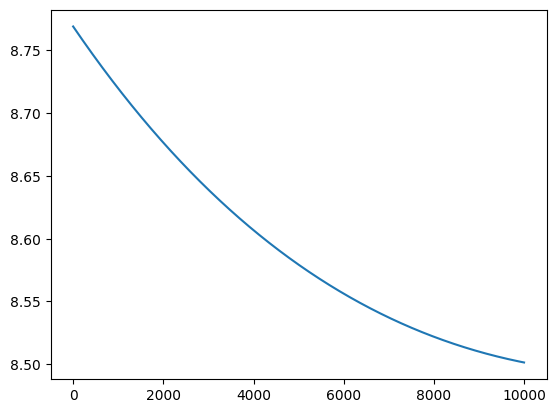

In [116]:
plt.plot(np.arange(iterations), cost_list)

In [117]:
def model_accuracy(x, y, w, b):
    A = predict(x, w, b)
    A = A > 0.5
    A = np.array(A, dtype='int64')
    accuracy = np.mean(A == y) * 100
    print("Accuracy of logistic regression model is ", accuracy, "%")


In [118]:
model_accuracy(X_test, Y_test, w,b)

Accuracy of logistic regression model is  60.641025641025635 %


### ***Logistic Regression Using Sklearn Library***

In [119]:
model = LogisticRegression()

In [120]:
model.fit(X_train, Y_train)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [121]:
y_pred = model.predict(X_test)

In [122]:
accuracy = accuracy_score(Y_test, y_pred)

In [123]:
print("Accuracy of the sklearn Logistic Regression model is:", accuracy*100, "%")


Accuracy of the sklearn Logistic Regression model is: 80.0 %
